Importing the libraries needed

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Adjusting the style for the plots

In [4]:
sns.set_style('whitegrid')
sns.set_style({ 'grid.color': '0.8','grid.linestyle': u'--',})
sns.set_palette('RdBu_r')

Importing the dataset

In [5]:
table=pd.read_csv("4SICS2.csv")

In [6]:
table.head(5)

,No.,Time,Source,Destination,Protocol,Length,Info,Expert
0,1,1.445465e+09,10.10.10.20,10.10.10.10,S7COMM,153,ROSCTR:[Job ] Function:[Read Var],NaN
1,2,1.445465e+09,10.10.10.10,10.10.10.20,TCP,60,102 > 49156 [ACK] Seq=1 Ack=100 Win=8192 Len=0,NaN
2,3,1.445465e+09,10.10.10.10,10.10.10.20,TCP,60,[TCP Dup ACK 2#1] 102 > 49156 [ACK] Seq=1 Ac...,Note
3,4,1.445465e+09,10.10.10.10,10.10.10.20,S7COMM,104,ROSCTR:[Ack_Data] Function:[Read Var],NaN
4,5,1.445465e+09,10.10.10.10,10.10.10.20,TCP,104,"[TCP Retransmission] 102 > 49156 [PSH, ACK] ...",Note


In [7]:
table.tail(5)

,No.,Time,Source,Destination,Protocol,Length,Info,Expert
2274742,2274743,1.445520e+09,77.245.33.76,10.100.152.128,ESP,126,ESP (SPI=0xa30ff23a),NaN
2274743,2274744,1.445520e+09,77.245.33.76,10.100.152.128,ESP,126,ESP (SPI=0xa30ff23a),NaN
2274744,2274745,1.445520e+09,77.245.33.76,10.100.152.128,ESP,126,ESP (SPI=0xa30ff23a),NaN
2274745,2274746,1.445520e+09,77.245.33.76,10.100.152.128,ESP,126,ESP (SPI=0xa30ff23a),NaN
2274746,2274747,1.445520e+09,77.245.33.76,10.100.152.128,ESP,126,ESP (SPI=0xa30ff23a),NaN


Basic Statistic of source and destination top IPs, number of total packets, etc etc...

In [9]:
table["Source"].describe()

count           2274747
unique              101
top       192.168.2.199
freq             396051
Name: Source, dtype: object

In [10]:
table["Destination"].describe()

count         2274747
unique            111
top       10.10.10.10
freq           237415
Name: Destination, dtype: object

In [12]:
print(sum(table.fillna(0)["Length"])/1000000, "MB")

172.840026 MB


Traffic Volume

Traffic per hour

<IPython.core.display.Javascript object>


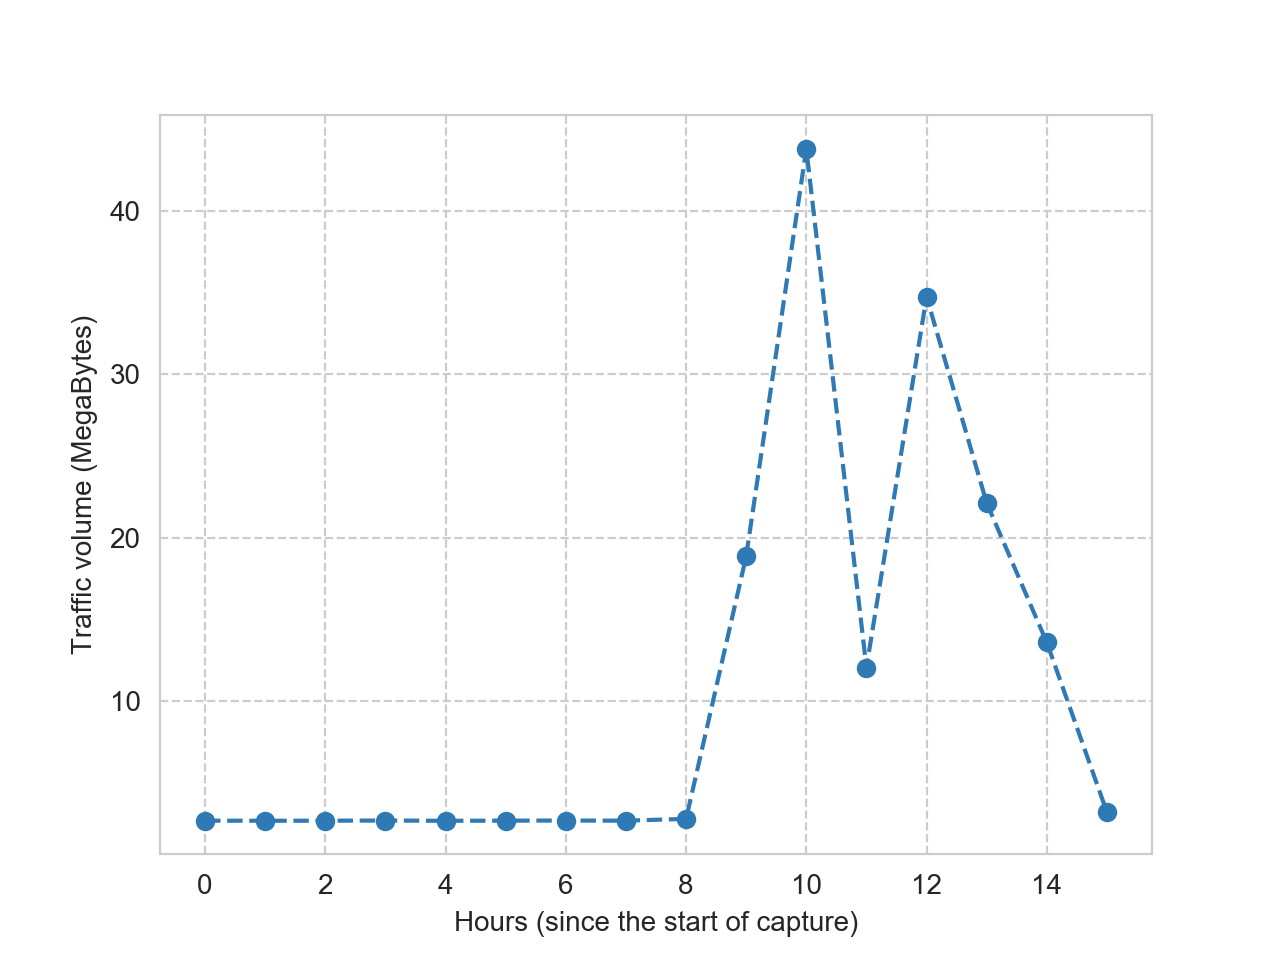

Text(0, 0.5, 'Traffic volume (MegaBytes)')

In [18]:
per_hr = pd.DataFrame(columns=["Hour", "Traffic"])
per_hr["Hour"] = table.Time.apply(lambda x: int((float(x)-1445465434)//3600))
per_hr["Traffic"] = table["Length"]
per_hr = per_hr.append([{"Hour":5, "Traffic": 0},{"Hour":6, "Traffic":0}],ignore_index=True)
p=per_hr.groupby("Hour",as_index=False).agg({"Traffic": [np.sum]})

p.Traffic = p.Traffic.apply(lambda x: x/1000000)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(p.Hour, p.Traffic, 'o--')
ax.set_xlabel("Hours (since the start of capture)")
ax.set_ylabel("Traffic volume (MegaBytes)")

Traffic per minute

<IPython.core.display.Javascript object>


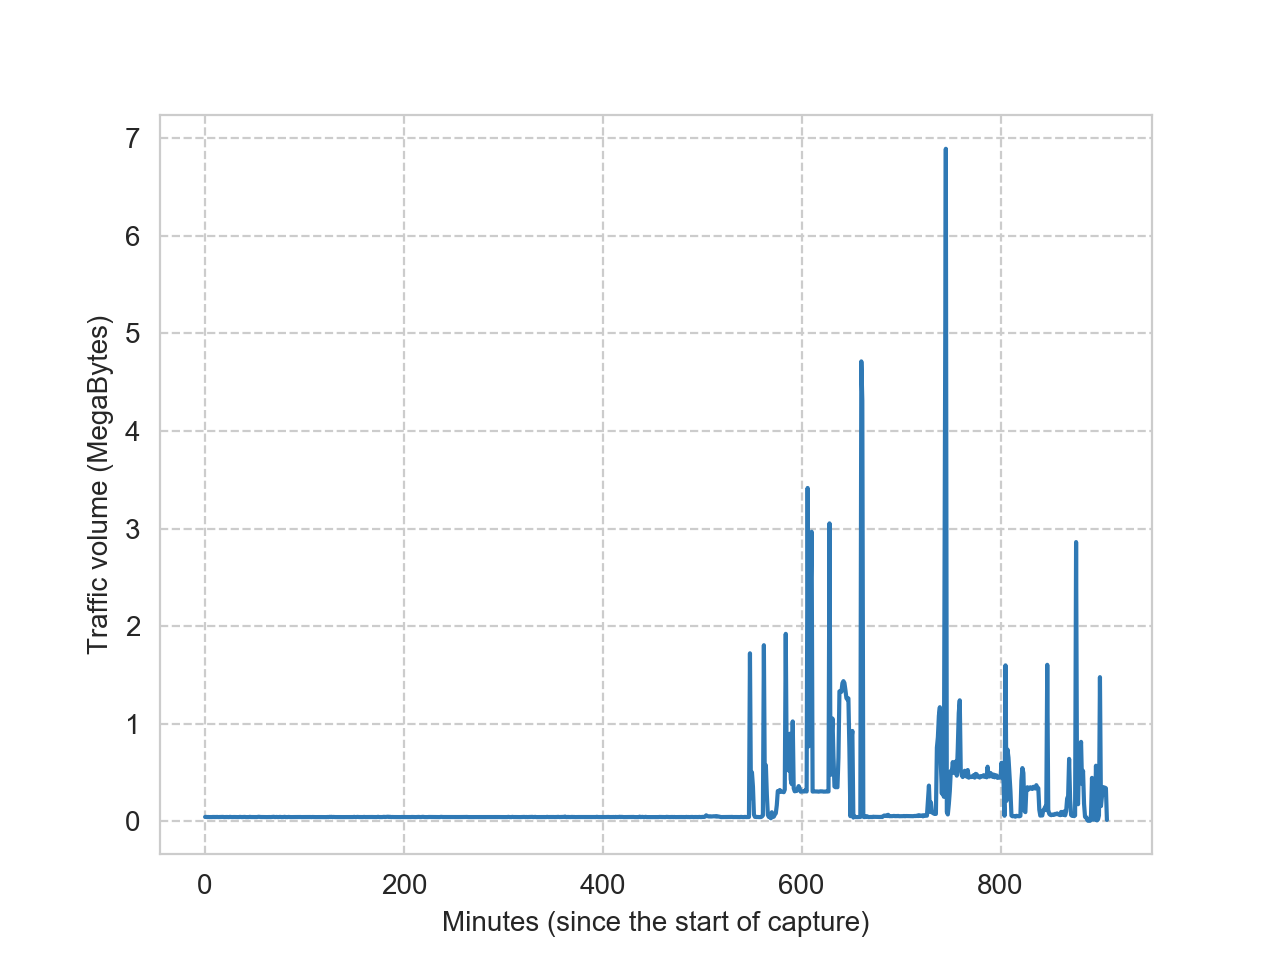

Text(0, 0.5, 'Traffic volume (MegaBytes)')

In [19]:
per_min = pd.DataFrame(columns=["Minute", "Traffic"])
per_min["Minute"] = table.Time.apply(lambda x: int((float(x)-1445465434)//60))
per_min["Traffic"] = table["Length"]
p=per_min.groupby("Minute",as_index=False).agg({"Traffic": [np.sum]})
p.Traffic = p.Traffic.apply(lambda x: x/1000000)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(p.Minute, p.Traffic)
ax.set_xlabel("Minutes (since the start of capture)")
ax.set_ylabel("Traffic volume (MegaBytes)")

Packet size

<IPython.core.display.Javascript object>


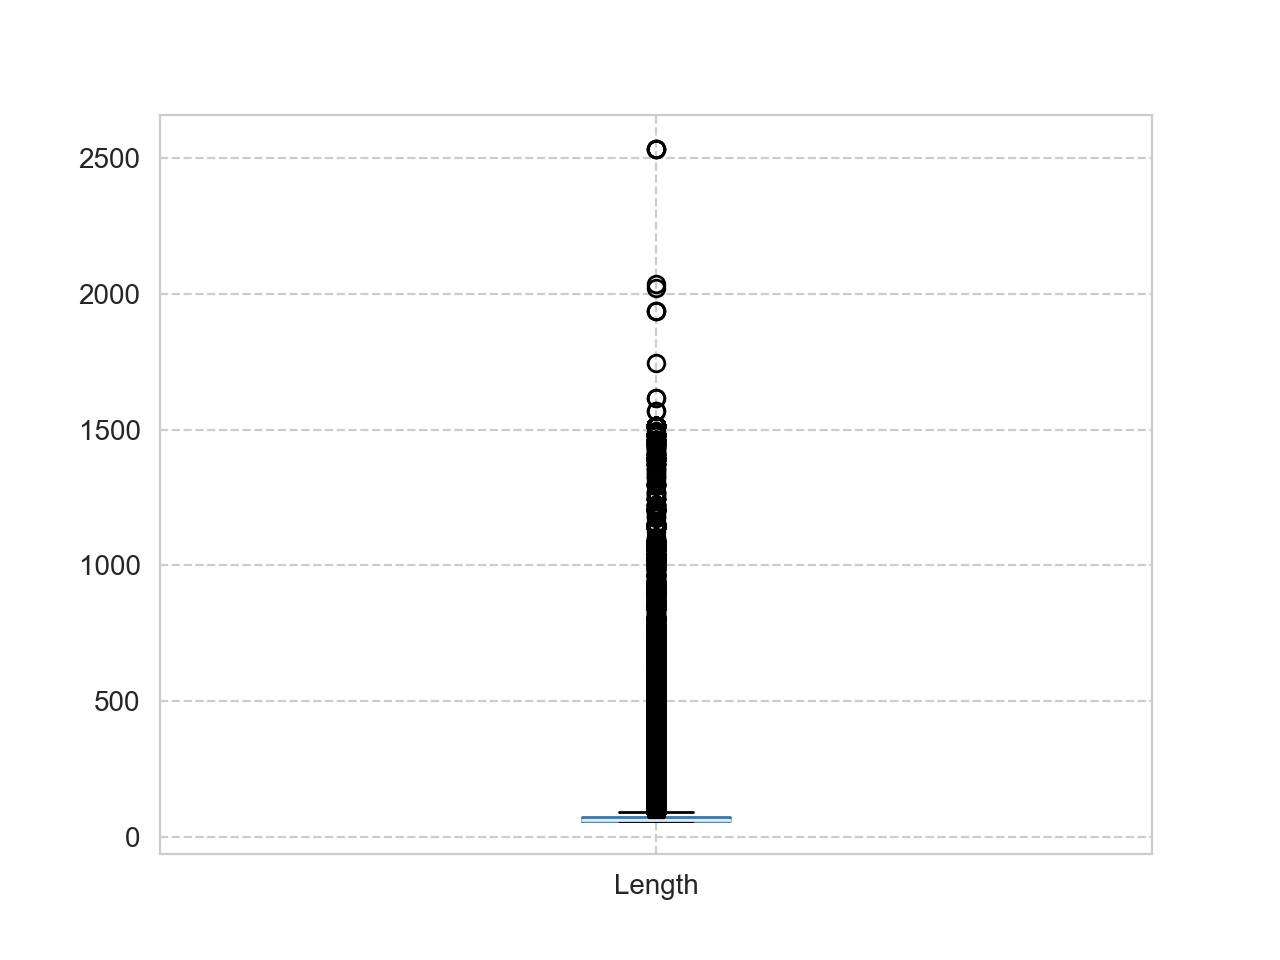

In [14]:
table.boxplot("Length", return_type='axes')

<IPython.core.display.Javascript object>


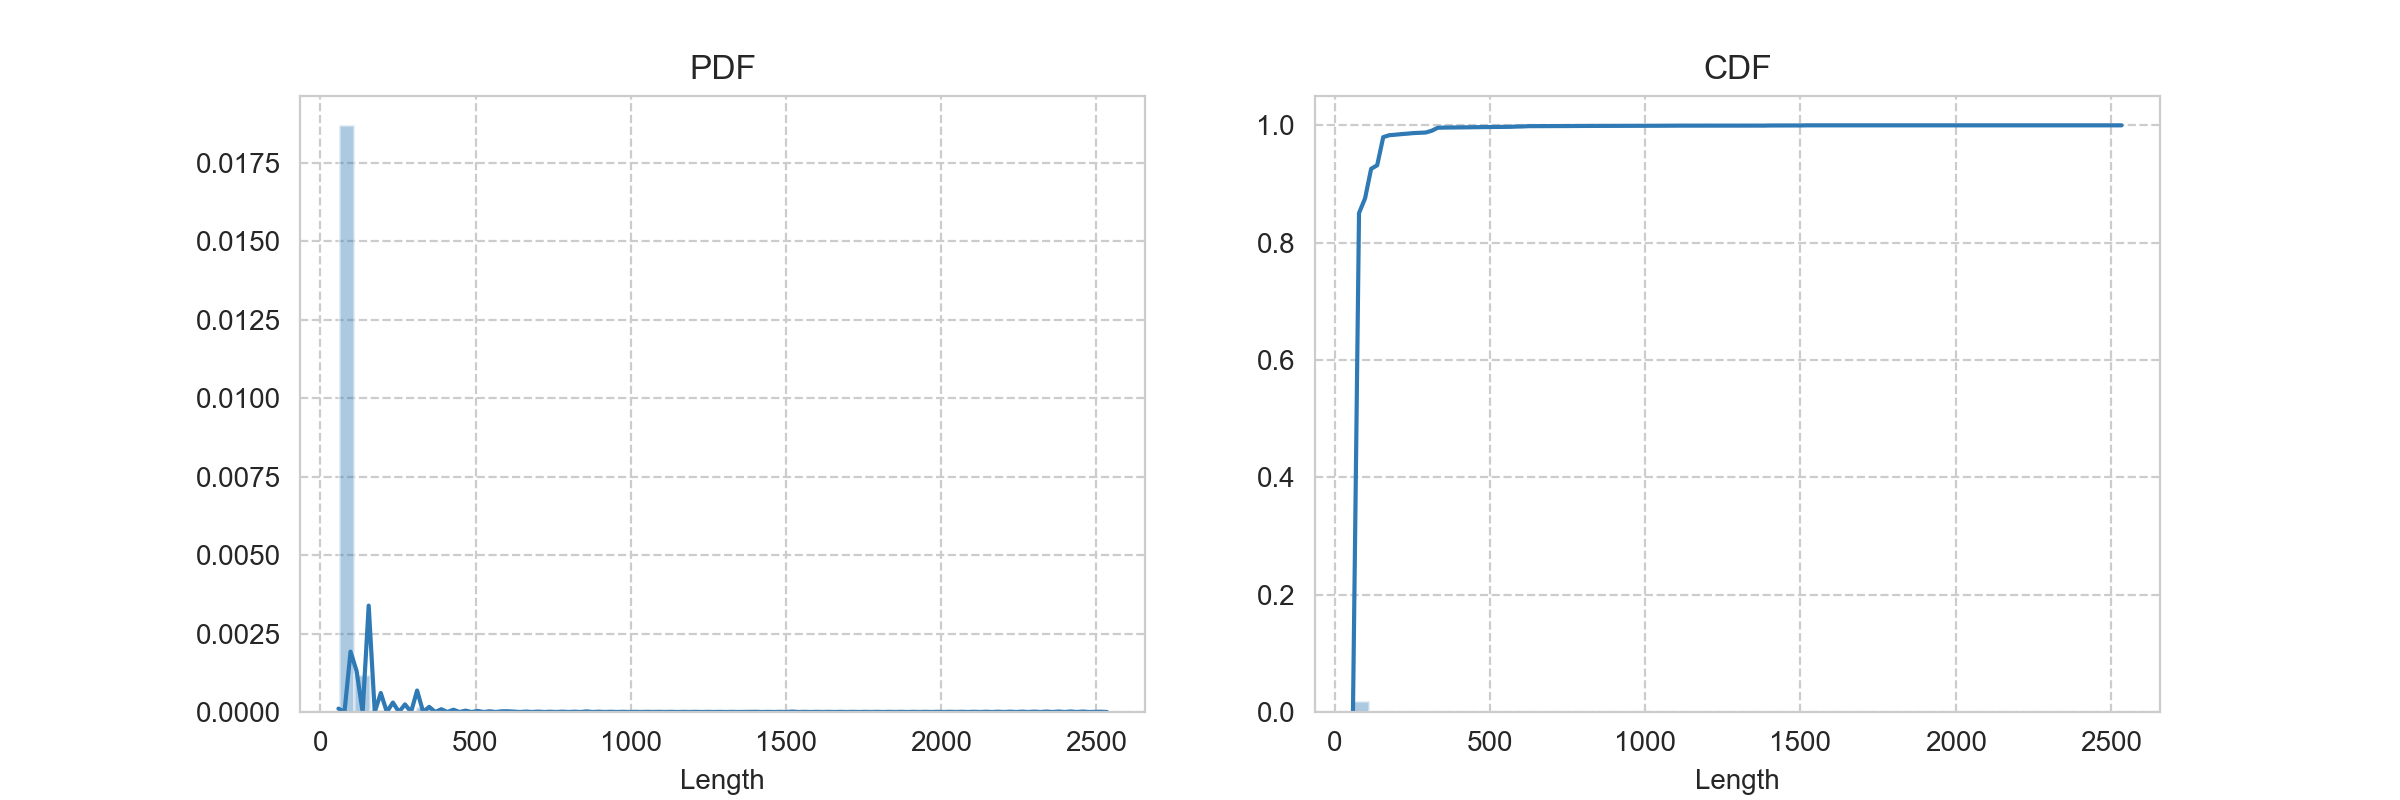

Text(0.5, 1.0, 'CDF')

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 4))

sns.distplot(table.fillna(0)["Length"], ax=ax1)
sns.distplot(table.fillna(0)["Length"], ax=ax2, kde_kws=dict(cumulative=True))
ax1.set_title("PDF")
ax2.set_title("CDF")

Traffic volume per IP address

<IPython.core.display.Javascript object>


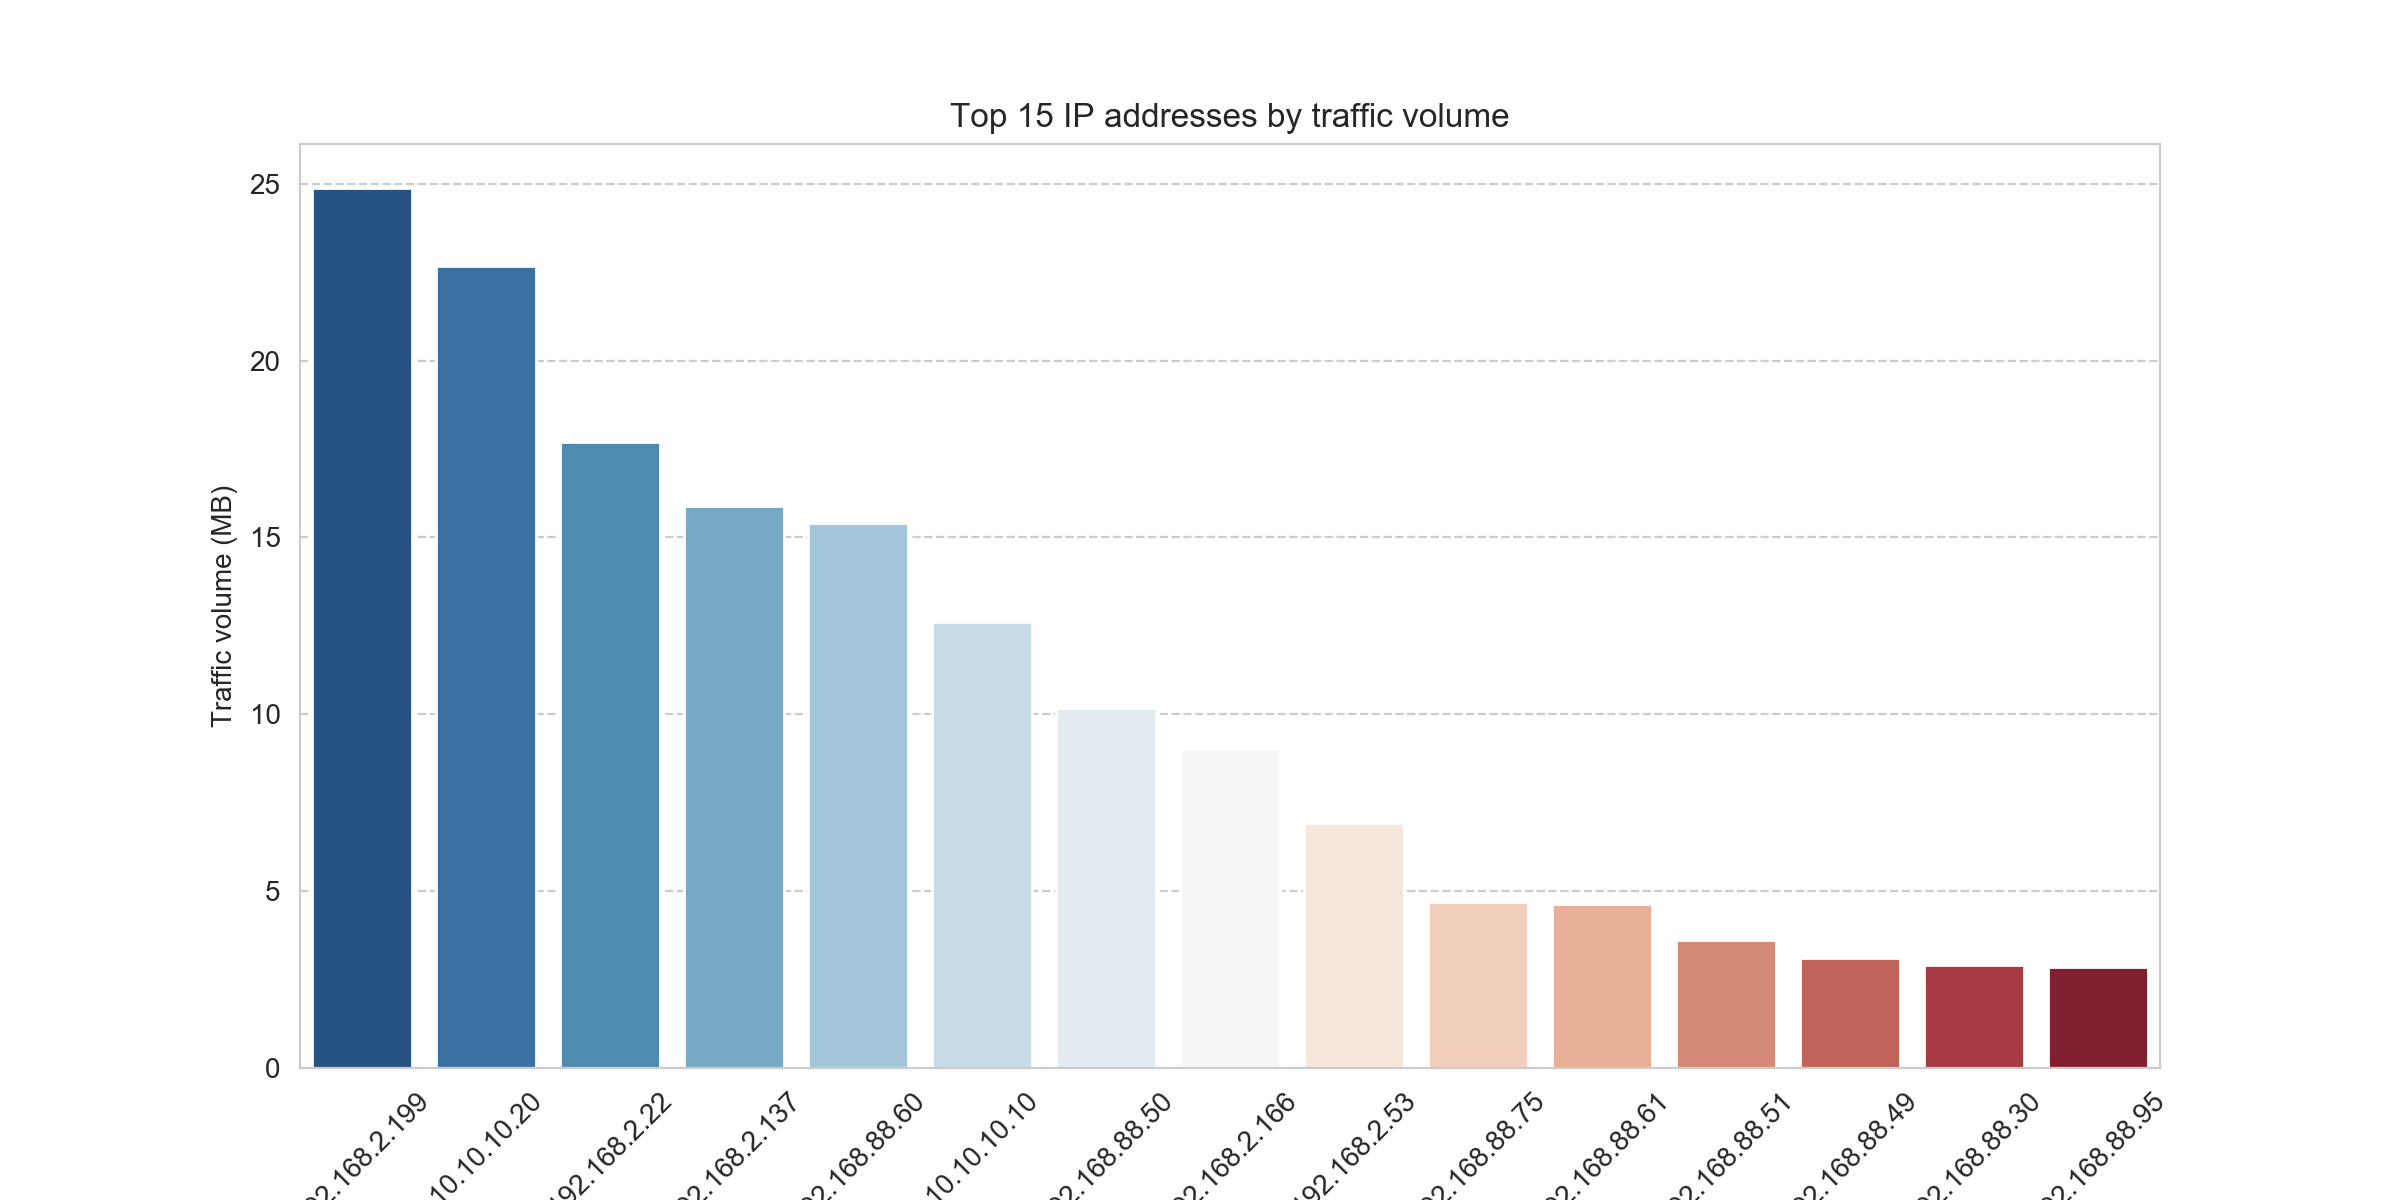

Text(0.5, 1.0, 'Top 15 IP addresses by traffic volume')

In [23]:
f, ax = plt.subplots(1, 1,figsize=(12, 6))

per_ip = table.groupby("Source", as_index=False).agg({"Length":[np.sum]})

p = per_ip.sort_values(by=("Length","sum"),ascending=False)[:15]
p["Length","sum"] = p["Length","sum"]/1000000
sns.barplot(p["Source"], p["Length","sum"],palette="RdBu_r", ax=ax)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylabel("Traffic volume (MB)")
ax.set_title("Top 15 IP addresses by traffic volume")

Traffic Volume per Protocol

<IPython.core.display.Javascript object>


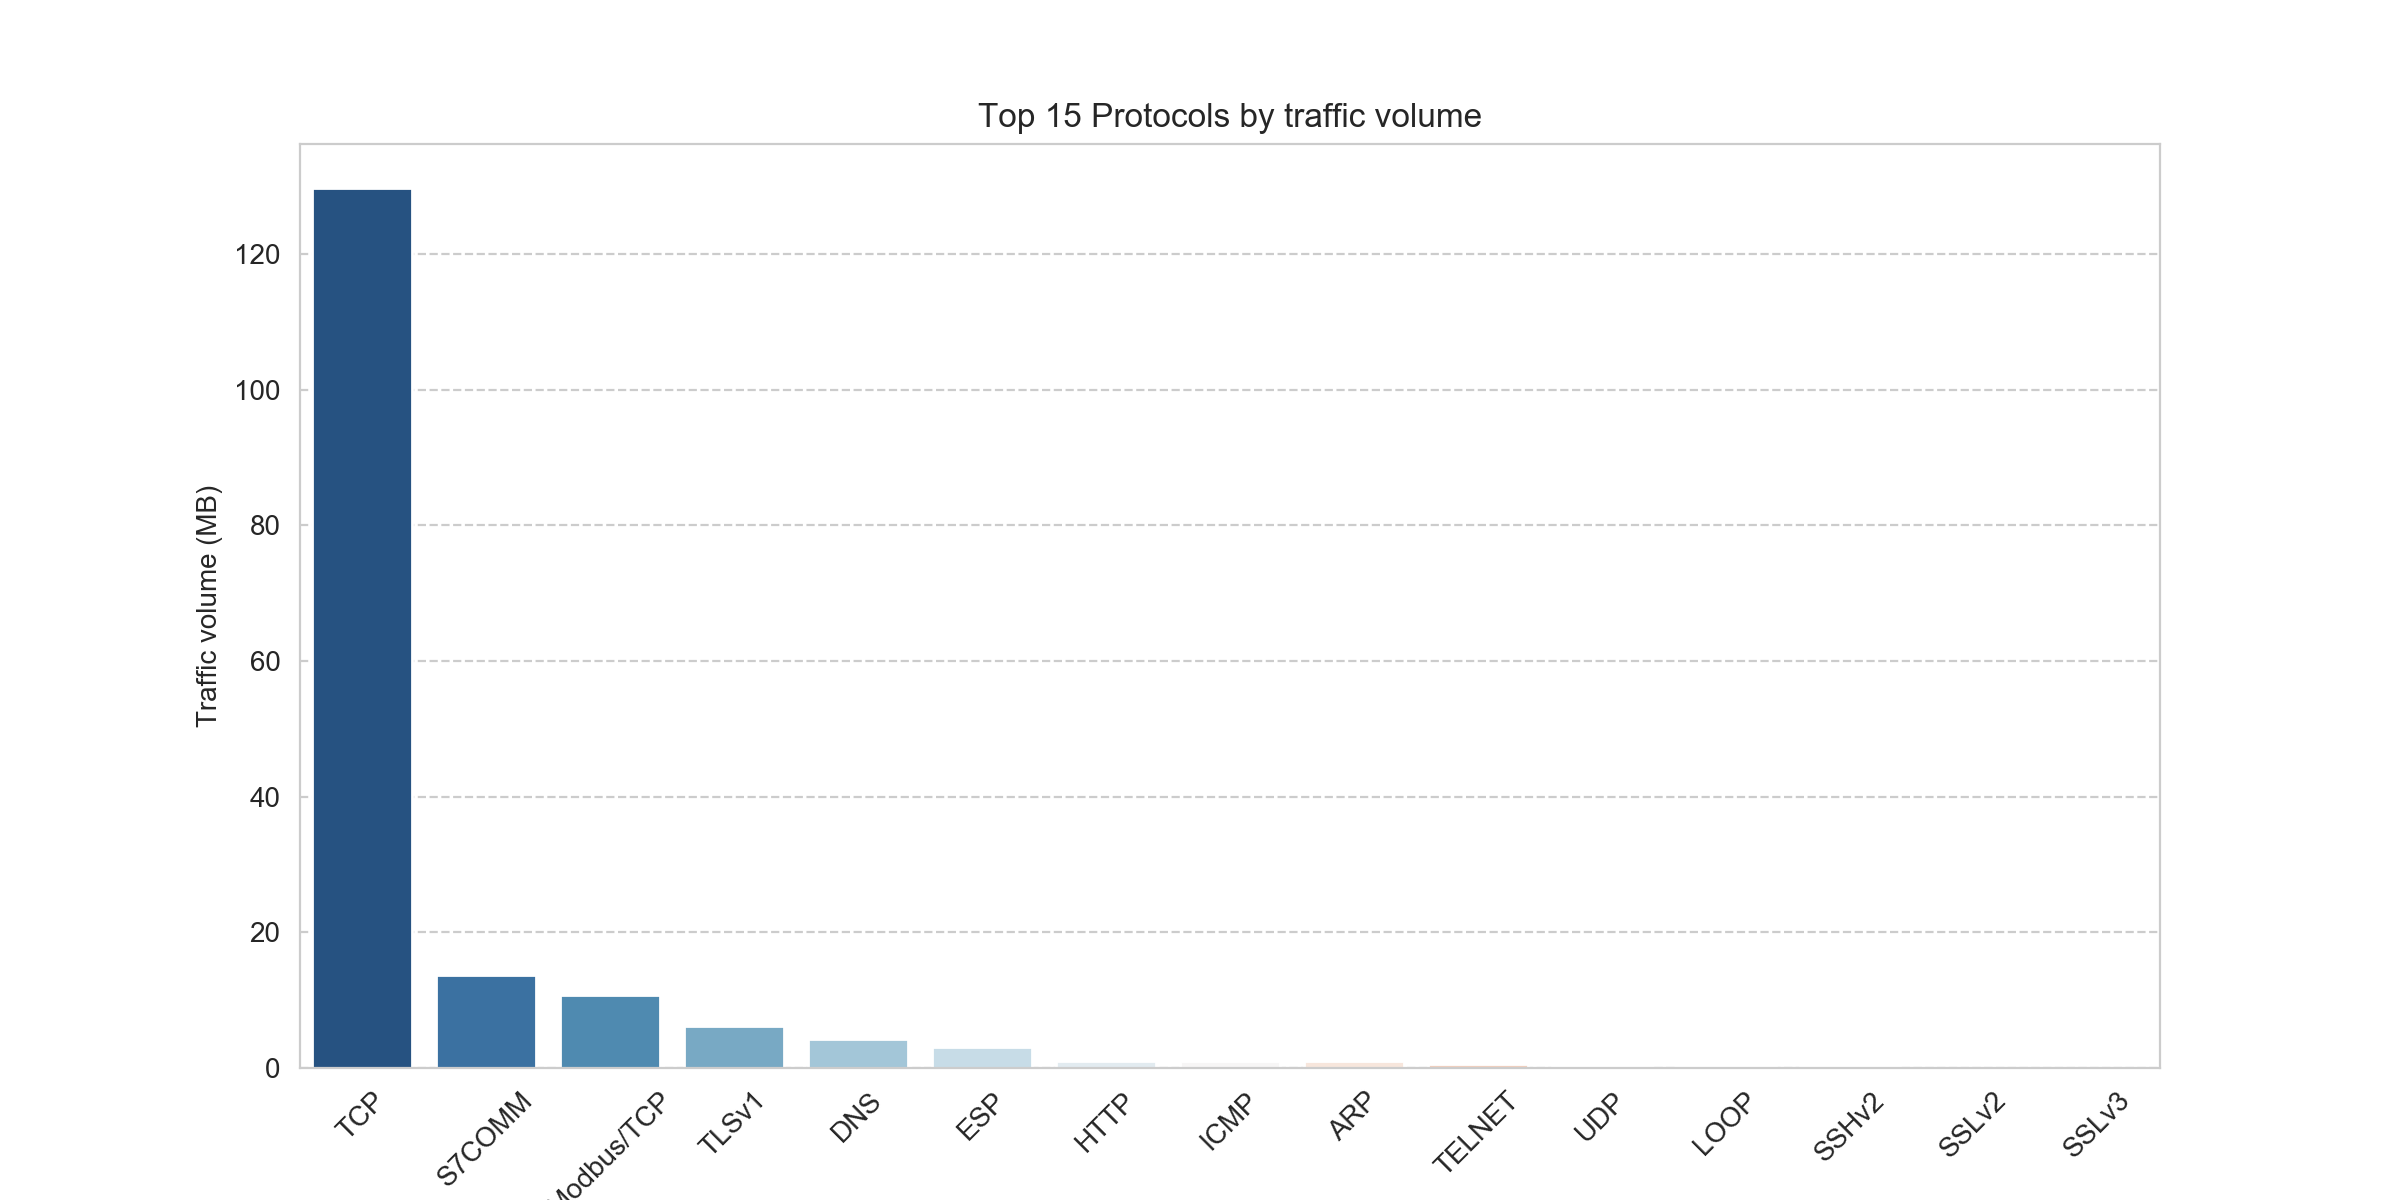

Text(0.5, 1.0, 'Top 15 Protocols by traffic volume')

In [24]:
f, ax = plt.subplots(1, 1,figsize=(12, 6))

per_ip = table.groupby("Protocol", as_index=False).agg({"Length":[np.sum]})

p = per_ip.sort_values(by=("Length","sum"),ascending=False)[:15]
p["Length","sum"] = p["Length","sum"]/1000000
sns.barplot(p["Protocol"], p["Length","sum"],palette="RdBu_r", ax=ax)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylabel("Traffic volume (MB)")
ax.set_title("Top 15 Protocols by traffic volume")